In [1]:
import os
import pandas as pd
from Pyfhel import Pyfhel, PyPtxt, PyCtxt
from datetime import datetime
import numpy as np
import sys
import time
import matplotlib.pyplot as plt



path_brazil = "Homomorphic/Brazil/Brazil Export Import Information"
path_london = "Homomorphic/London/Smart meters in London"

# Encriptação Homomorfica
## Estatisticas retiradas
   - Media
   - Variancia
   - Mediana
   - Q1
   - Q3
   - IQR
   - Min
   - Max
   - Sum
   
Desta parte do projeto decidimos implementar uma classe com metodos que calculam as estatisticas enumeradas em cima.

Para tal guardamos os tempos das operações de modo a posteriormente fazer a sua análise.

## Searchable - Clusion 

In [31]:
# Processamento dos dados

temp_daily = pd.read_csv(path_london+'/weather_daily_darksky.csv').sort_values("temperatureMaxTime")
temp_daily

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
13,15.57,2011-11-01 15:00:00,208,partly-cloudy-day,10.13,2011-11-01 22:00:00,0.36,2.45,1009.46,2011-11-01 22:00:00,...,15.57,2011-11-01 06:54:29,2011-11-01 15:00:00,2011-11-01 10:00:00,Partly cloudy until evening.,2011-11-02 03:00:00,9.01,2011-11-01 15:00:00,2011-11-02 03:00:00,0.21
60,15.19,2011-11-02 23:00:00,134,partly-cloudy-night,10.23,2011-11-02 03:00:00,0.39,4.39,1004.79,2011-11-02 03:00:00,...,15.06,2011-11-02 06:56:16,2011-11-02 13:00:00,2011-11-02 09:00:00,Partly cloudy throughout the day.,2011-11-02 19:00:00,7.33,2011-11-02 23:00:00,2011-11-02 19:00:00,0.24
34,17.41,2011-11-03 14:00:00,154,partly-cloudy-day,13.39,2011-11-03 21:00:00,0.52,3.99,993.40,2011-11-03 21:00:00,...,17.41,2011-11-03 06:58:03,2011-11-03 14:00:00,2011-11-03 10:00:00,Partly cloudy throughout the day.,2011-11-04 07:00:00,12.79,2011-11-03 14:00:00,2011-11-04 07:00:00,0.27
31,15.54,2011-11-04 11:00:00,179,fog,12.03,2011-11-04 23:00:00,0.50,2.62,995.54,2011-11-04 23:00:00,...,15.54,2011-11-04 06:59:49,2011-11-04 11:00:00,2011-11-04 10:00:00,Foggy overnight.,2011-11-05 02:00:00,11.53,2011-11-04 11:00:00,2011-11-05 02:00:00,0.31
46,13.94,2011-11-05 15:00:00,346,fog,10.96,2011-11-05 02:00:00,0.65,2.70,1007.39,2011-11-05 02:00:00,...,13.94,2011-11-05 07:01:36,2011-11-05 15:00:00,2011-11-05 10:00:00,Foggy in the morning.,2011-11-06 05:00:00,10.17,2011-11-05 15:00:00,2011-11-06 06:00:00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,10.04,2014-03-27 13:00:00,75,fog,2.08,2014-03-27 05:00:00,0.44,2.36,1012.88,2014-03-27 06:00:00,...,10.04,2014-03-27 05:48:40,2014-03-27 13:00:00,2014-03-27 13:00:00,Foggy overnight.,2014-03-28 03:00:00,0.62,2014-03-27 13:00:00,2014-03-28 03:00:00,0.88
876,12.43,2014-03-28 14:00:00,87,fog,3.67,2014-03-28 03:00:00,0.19,3.31,1014.82,2014-03-28 03:00:00,...,12.43,2014-03-28 05:46:23,2014-03-28 14:00:00,2014-03-28 11:00:00,Foggy in the morning.,2014-03-29 01:00:00,1.69,2014-03-28 14:00:00,2014-03-29 02:00:00,0.92
867,18.47,2014-03-29 14:00:00,105,clear-day,5.37,2014-03-29 01:00:00,0.08,4.19,1014.25,2014-03-29 02:00:00,...,18.47,2014-03-29 05:44:05,2014-03-29 14:00:00,2014-03-29 12:00:00,Clear throughout the day.,2014-03-30 05:00:00,5.41,2014-03-29 14:00:00,2014-03-30 04:00:00,0.96
830,19.82,2014-03-30 12:00:00,114,partly-cloudy-day,5.81,2014-03-30 05:00:00,0.31,2.18,1013.04,2014-03-30 04:00:00,...,19.82,2014-03-30 05:41:48,2014-03-30 12:00:00,2014-03-30 11:00:00,"Mostly cloudy starting in the afternoon, conti...",2014-03-31 06:00:00,8.14,2014-03-30 12:00:00,2014-03-31 06:00:00,0.99


In [32]:
# Processamento dos dados

pd.set_option('display.max_columns', None)
format_string = "%Y-%m-%d"
format_string_m_h_s = "%Y-%m-%d %H:%M:%S"
temp_daily["date"] = list(map(lambda date: datetime.strptime(date.split(" ")[0], format_string),temp_daily["temperatureMaxTime"]))
temp_daily["sunriseDate"] = list(map(lambda date: datetime.strptime(date, format_string_m_h_s).hour*60 + datetime.strptime(date, format_string_m_h_s).minute ,temp_daily["sunriseTime"]))
temp_daily["sunsetDate"] = list(map(lambda date: datetime.strptime(date, format_string_m_h_s).hour*60 + datetime.strptime(date, format_string_m_h_s).minute ,temp_daily["sunsetTime"]))
temp_daily = temp_daily.dropna()
filtered_data =  temp_daily[["date","temperatureMax","temperatureMin","sunriseDate","sunsetDate","humidity", "pressure","windSpeed"]]

In [33]:
covid_data = pd.read_csv("full_grouped.csv")

In [34]:
class homomorphic_encryption():
    def __init__(self, array):
        
        # Gerar chaves
        self.HE = Pyfhel()        
        self.HE.contextGen(p=65537) 
        self.HE.keyGen()
        
        # animacao de loading
        self.loading_animation = ['|', '/', '-', '\\']
        
        # array encriptado
        self.encrypt_data = self._encrypt_array(np.sort(np.array(array)))
                
        # tamanho do dados
        self.size = len(array)
        
        # estatisticas
        self.max = -1
        self.min = -1
        self.mean = -1
        self.sum = -1
        self.variance = -1
        
        # Arrays de tempos de execução
        self.time_sum = []
        self.time_max = []
        self.time_min = []
        self.time_variance = []
        self.x_plot = list(range(10,self.size,50))
    
    # Metodo que arredonda os dados encriptados
    def round_encryped(n,d):
        return ar.HE.encryptFrac(round(ar.HE.decryptFrac(n),d))

    # Este metodo percorre os dados raw e encripta-os
    def _encrypt_array(self,original_data):
        print("[LOAD ARRAY]\n")
        start_t = time.time()
        encrypt_data = []
        size = len(original_data)
        for i,elem in enumerate(original_data):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(size)+"]")
            encrypt_data.append(self.HE.encryptFrac(elem))
        sys.stdout.flush()
        sys.stdout.write("\rDone! - ["+str(size)+"/"+str(size)+"]")
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return encrypt_data
        
    # Metodo para calcular a mediana
    def calculate_median(self):
        if self.size%2 == 1:
            return self.encrypt_data[self.size//2]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//2] + self.encrypt_data[self.size//2-1])*aux
    
    # Metodo para calcular a Q1
    def calculate_Q1(self):
        if self.size%4 == 1:
            return self.encrypt_data[self.size//4]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//4] + self.encrypt_data[self.size//4-1])*aux
    
    # Metodo para calcular a Q3
    def calculate_Q3(self):
        if self.size%4 == 1:
            return self.encrypt_data[self.size//4+self.size//2]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//4+self.size//2] + self.encrypt_data[self.size//4-1+self.size//2])*aux
    
    # Metodo para calcular a valor maximo
    def calculate_max(self):
        print("[CALCULATE MAX]")
        start_t = time.time()
        self.max = self.HE.encryptFrac(-1.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            if self.HE.decryptFrac(self.max - elem)<0:
                self.max = elem
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular o valor minimo
    def calculate_min(self):
        print("[CALCULATE MIN]")
        start_t = time.time()
        self.min = self.HE.encryptFrac(999999.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            if self.HE.decryptFrac(self.min - elem) > 0:
                self.min = elem
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a soma do array
    def calculate_sum(self):
        print("[CALCULATE SUM]")
        start_t = time.time()
        tot = self.HE.encryptFrac(0.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            tot = tot + elem
        self.sum = self.HE.encryptFrac(round(self.HE.decryptFrac(tot),2))
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a media
    def calculate_mean(self):
        print("[CALCULATE MEAN]")
        start_t = time.time()
        tot = self.sum
        size_encr = self.HE.encryptFrac(1.0/float(self.size))
        self.mean = tot*size_encr
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a variancia
    def calculate_variance(self):
        print("[CALCULATE VARIANCE]")
        start_t = time.time()
        if self.mean == -1:
            self.calculate_mean()
        self.mean = round_encryped(self.mean,2)
        tot = self.HE.encryptFrac(0.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            diff = round_encryped((elem-mean),2)
            tot = round_encryped(tot + diff*diff,2)
        size_encr = self.HE.encryptFrac(1.0/float(self.size))
        self.variance = tot*size_encr
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo gerar os arrays com os tempos
    def generate_times(self):
        self.time_sum = []
        self.time_max = []
        self.time_min = []
        act_size = self.size
        for i in range(10,self.size,50):
            print("CALCULATE FOR LEN - ",str(i))
            self.size = i
            self.time_sum.append(self.calculate_sum())
            self.time_max.append(self.calculate_max())
            self.time_min.append(self.calculate_min())
            
        self.size = act_size
    
    # Metodo para dar plots
    def plot_times(self):
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_sum)
        plt.plot(self.x_plot,self.time_sum)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Calculate Sum")
        plt.show()
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_max)
        plt.plot(self.x_plot,self.time_max)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Find max value Data")
        plt.show()
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_min)
        plt.plot(self.x_plot,self.time_min)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Find min value Data")
        plt.show()
        

        
    # Metodo que retorna as estatisticas todas extraidas
    def get_all_statistics_decrypted(self):
        start_t = time.time()
        if(self.max == -1):
            print("Max not yet calculated, call method calculate_max() to get this statistic\n")
        else:
            print("MAX -> ",round(self.HE.decryptFrac(self.max),2),"\n")
        if(self.min == -1):
            print("Min not yet calculated, call method calculate_min() to get this statistic\n")
        else:
            print("MIN -> ",round(self.HE.decryptFrac(self.min),2),"\n")
        if(self.mean == -1):
            print("Mean not yet calculated, call method calculate_mean() to get this statistic\n")
        else:
            print("MEAN -> ",round(self.HE.decryptFrac(self.mean),2),"\n")
        if(self.sum == -1):
            print("Sum not yet calculated, call method calculate_sum() to get this statistic\n")
        else:
            print("SUM -> ",round(self.HE.decryptFrac(self.sum),2),"\n")
        if(self.variance == -1):
            print("Variance not yet calculated, call method calculate_variance() to get this statistic\n")
        else:
            print("VARIANCE -> ",round(self.HE.decryptFrac(self.variance),2),"\n")
      
        print("Median -> ",round(self.HE.decryptFrac(self.calculate_median()),2),"\n")
        
        print("First Quartile -> ",round(self.HE.decryptFrac(self.calculate_Q1()),2),"\n")
        
        print("Third Quartile -> ",round(self.HE.decryptFrac(self.calculate_Q3()),2),"\n")
        
        print("Inter-Quartile Range -> ",round(self.HE.decryptFrac(self.calculate_Q3() - self.calculate_Q1()),2),"\n")
        
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")

    
# Criação do objeto da classe
ar = homomorphic_encryption(covid_data["New cases"])

[LOAD ARRAY]

Loading | [181/35156]

KeyboardInterrupt: 

In [ ]:
ar.get_all_statistics_decrypted()

In [ ]:
ar.calculate_max()

In [ ]:
ar.calculate_min()

In [ ]:
ar.calculate_sum()

In [ ]:
mean = ar.calculate_mean()

In [ ]:
#aux = ar.calculate_variance()

In [ ]:
ar.get_all_statistics_decrypted()

In [29]:
ar.generate_times()

CALCULATE FOR LEN -  10
[CALCULATE SUM]
Loading / [10/10]
Time Elapsed: 0.0897 seconds!
[CALCULATE MAX]
Loading / [10/10]
Time Elapsed: 0.0416 seconds!
[CALCULATE MIN]
Loading / [10/10]
Time Elapsed: 0.0594 seconds!
CALCULATE FOR LEN -  60
[CALCULATE SUM]
Loading \ [60/60]
Time Elapsed: 0.1652 seconds!
[CALCULATE MAX]
Loading \ [60/60]
Time Elapsed: 0.2039 seconds!
[CALCULATE MIN]
Loading \ [60/60]
Time Elapsed: 0.1893 seconds!
CALCULATE FOR LEN -  110
[CALCULATE SUM]
Loading / [110/110]
Time Elapsed: 0.2143 seconds!
[CALCULATE MAX]
Loading / [110/110]
Time Elapsed: 0.3964 seconds!
[CALCULATE MIN]
Loading / [110/110]
Time Elapsed: 0.4614 seconds!
CALCULATE FOR LEN -  160
[CALCULATE SUM]
Loading \ [160/160]
Time Elapsed: 0.4681 seconds!
[CALCULATE MAX]
Loading \ [160/160]
Time Elapsed: 0.4644 seconds!
[CALCULATE MIN]
Loading \ [160/160]
Time Elapsed: 0.3827 seconds!
CALCULATE FOR LEN -  210
[CALCULATE SUM]
Loading / [210/210]
Time Elapsed: 0.4993 seconds!
[CALCULATE MAX]
Loading / [210/

Loading / [1810/1810]
Time Elapsed: 5.062 seconds!
[CALCULATE MIN]
Loading / [1810/1810]
Time Elapsed: 4.0871 seconds!
CALCULATE FOR LEN -  1860
[CALCULATE SUM]
Loading \ [1860/1860]
Time Elapsed: 3.0777 seconds!
[CALCULATE MAX]
Loading \ [1860/1860]
Time Elapsed: 4.829 seconds!
[CALCULATE MIN]
Loading \ [1860/1860]
Time Elapsed: 4.1702 seconds!
CALCULATE FOR LEN -  1910
[CALCULATE SUM]
Loading / [1910/1910]
Time Elapsed: 4.1486 seconds!
[CALCULATE MAX]
Loading / [1910/1910]
Time Elapsed: 4.7524 seconds!
[CALCULATE MIN]
Loading / [1910/1910]
Time Elapsed: 4.0336 seconds!
CALCULATE FOR LEN -  1960
[CALCULATE SUM]
Loading \ [1960/1960]
Time Elapsed: 3.5033 seconds!
[CALCULATE MAX]
Loading \ [1960/1960]
Time Elapsed: 4.4228 seconds!
[CALCULATE MIN]
Loading \ [1960/1960]
Time Elapsed: 4.9323 seconds!
CALCULATE FOR LEN -  2010
[CALCULATE SUM]
Loading / [2010/2010]
Time Elapsed: 3.7123 seconds!
[CALCULATE MAX]
Loading / [2010/2010]
Time Elapsed: 4.7047 seconds!
[CALCULATE MIN]
Loading / [201

KeyboardInterrupt: 

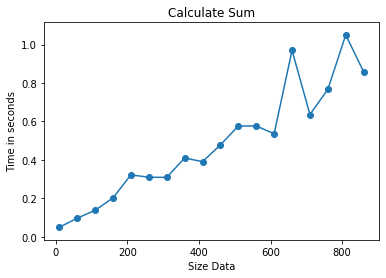

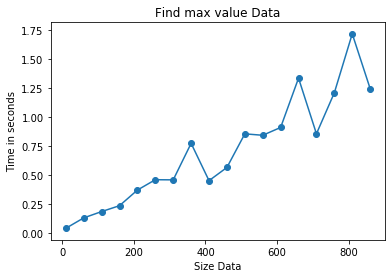

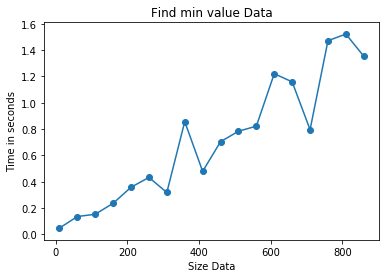

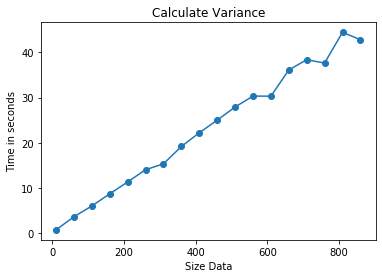

In [434]:
ar.plot_times()

In [ ]:
def round_encryped(n,d):
    return ar.HE.encryptFrac(round(ar.HE.decryptFrac(n),d))

In [260]:
soma = ar.HE.encryptFrac(0.0)
for elem in ar.encrypt_data:
    a = round_encryped((elem-mean),2)
    soma = round_encryped(soma + a*a,2)
    
ar.HE.decryptFrac(soma)

33671.679999999935

In [394]:
ar.time_sum
ar.time_max
ar.time_min
ar.time_variance

[0.5601,
 2.8503,
 5.11,
 7.3712,
 9.6958,
 11.9027,
 14.1593,
 16.4539,
 18.968,
 21.3066,
 23.8865,
 26.0365,
 28.842,
 30.643,
 33.7667,
 35.4744,
 37.2859,
 36.6301]

In [396]:
x =list(range(10,881,50))

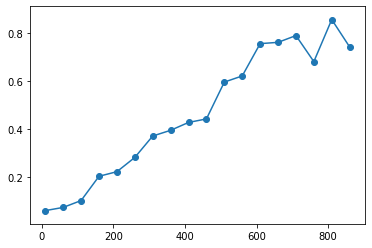

In [406]:
import matplotlib.pyplot as plt

plt.scatter(x,ar.time_sum)
plt.plot(x,ar.time_sum)
plt.show()

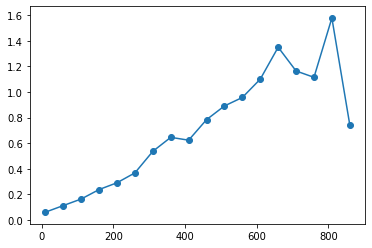

In [407]:
plt.scatter(x,ar.time_max)
plt.plot(x,ar.time_max)
plt.show()

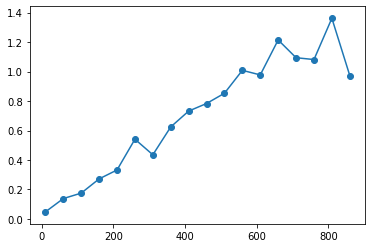

In [409]:
plt.scatter(x,ar.time_min)
plt.plot(x,ar.time_min)
plt.show()

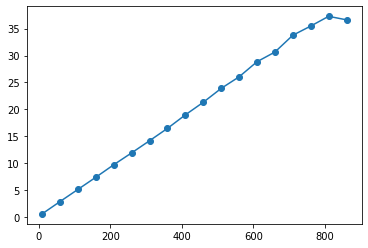

In [410]:
plt.scatter(x,ar.time_variance)
plt.plot(x,ar.time_variance)
plt.show()

0          0
1          0
2          0
3          0
4          0
        ... 
35151    152
35152      0
35153     10
35154     71
35155    192
Name: New cases, Length: 35156, dtype: int64

In [6]:
analyse_data = pd.read_csv("Time_Analysis.csv").drop(columns =["Unnamed: 0"])

In [21]:
analyse_data

,Sum,Max,Min,Norm
0,0.0402,0.0207,0.0209,0.0003
1,0.0392,0.0300,0.0296,0.0003
2,0.0407,0.0380,0.0371,0.0003
3,0.0403,0.0468,0.0453,0.0003
4,0.0420,0.0548,0.0540,0.0003
...,...,...,...,...
395,0.2796,3.2829,3.3460,33.4054
396,0.3113,3.2791,3.3580,33.5438
397,0.2824,3.2939,3.3743,33.6353
398,0.3050,3.2932,3.3707,33.7022


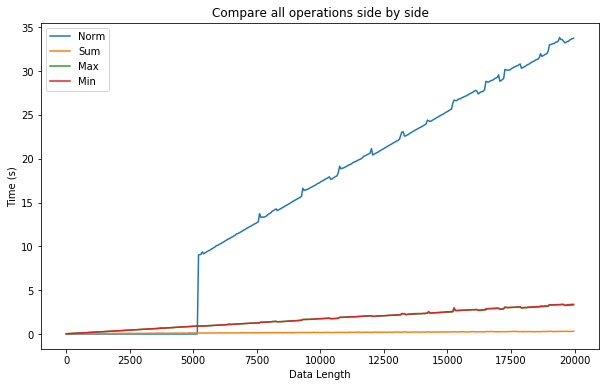

In [35]:
x = [i*50+10 for i in range(400)]
fig = plt.figure(figsize=(10,6))
plt.plot(x,analyse_data.Norm,label="Norm")
plt.plot(x,analyse_data.Sum,label="Sum")
plt.plot(x,analyse_data.Max,label="Max")
plt.plot(x,analyse_data.Min,label="Min")
plt.title("Compare all operations side by side")
plt.xlabel("Data Length")
plt.ylabel("Time (s)")
plt.legend()
plt.show()
fig.savefig('Plots/Comparation.jpg', bbox_inches='tight', dpi=150)

# Exercicio GP

In [54]:
days = [1,2,3,4,5,6,7,8]
days_5 = [1,2,3,4,5]
earned = [0,5000,5000,10000,13750]
cost = [0,3500,3500,8500,12250]
predicted_cost = [5000,7500,10000,12500,15000,17500,20000,20000]

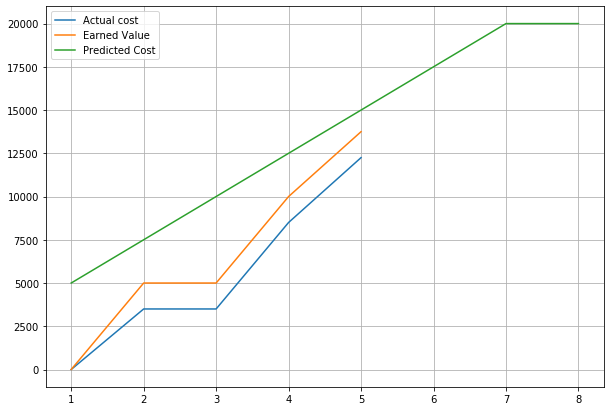

In [55]:
plt.figure(figsize = (10,7))
plt.plot(days_5,cost,label = "Actual cost")
plt.plot(days_5,earned,label = "Earned Value")
plt.plot(days,predicted_cost, label = "Predicted Cost")
plt.grid(True)
plt.legend()
plt.show()

In [65]:
pv = 12500
ac = 12250
ev = 13750
bac = 20000
cpi = ev/ac
spi = ev/pv
eac = bac/cpi
etc = eac-ac
vac = bac-eac
cv = ev-ac
sv = ev-pv

In [68]:
print(" PV ->",pv)
print(" AC ->",ac)
print(" EV ->",ev)
print("BAC ->",bac)
print(" CV ->",cv)
print(" SV ->",sv)
print("CPI ->",round(cpi,4))
print("SPI ->",round(spi,4))
print("EAC ->",round(eac,4))
print("ETC ->",round(etc,4))
print("VAC ->",round(vac,4))

 PV -> 12500
 AC -> 12250
 EV -> 13750
BAC -> 20000
 CV -> 1500
 SV -> 1250
CPI -> 1.1224
SPI -> 1.1
EAC -> 17818.1818
ETC -> 5568.1818
VAC -> 2181.8182


## Partir Biblia

In [77]:
fo = open("biblia.txt", "r")
lines = fo.readlines()
lines

['The First Book of Moses: Called Genesis\n',
 '1:1 In the beginning God created the heaven and the earth.\n',
 '\n',
 '1:2 And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.\n',
 '\n',
 '1:3 And God said, Let there be light: and there was light.\n',
 '\n',
 '1:4 And God saw the light, that it was good: and God divided the light from the darkness.\n',
 '\n',
 '1:5 And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.\n',
 '\n',
 '1:6 And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.\n',
 '\n',
 '1:7 And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.\n',
 '\n',
 '1:8 And God called the firmament Heaven. And the evening and the morning were the second day.\n',
 '\n',
 '1:9 And God s

In [83]:
book_name = "The First Book of Moses: Called Genesis"
for line in lines:
    if line != "\n":
        if line[0].isdigit():
            f = open("bible/"+book_name+"-"+line.split()[0]+".txt", "w")
            f.write(line)
            f.close()
        elif "Book of" in line:
            book_name = line.strip()

## Searchable

In [3]:
def plot_figure(n, title, y, path):
    fig = plt.figure(n)
    plt.grid(True)
    plt.title(title)
    plt.xlabel("Words")
    plt.xticks(rotation=90)
    plt.ylabel("Search time (hundredths of seconds)")
    plt.scatter(search_words, y)
    plt.plot(search_words, y)
    #fig.savefig(path, bbox_inches='tight', dpi=150)


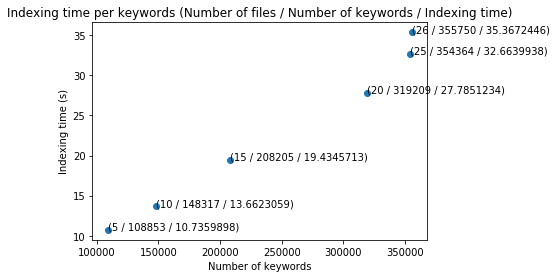

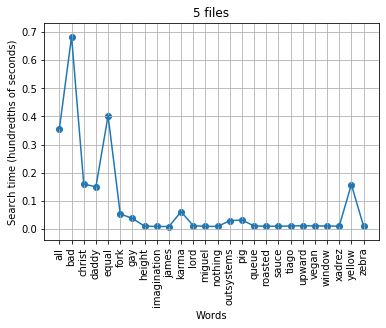

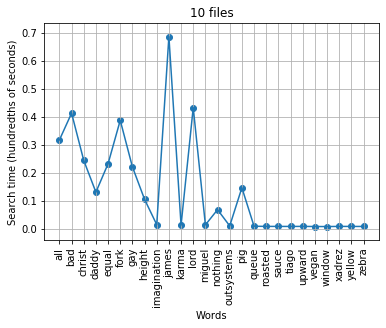

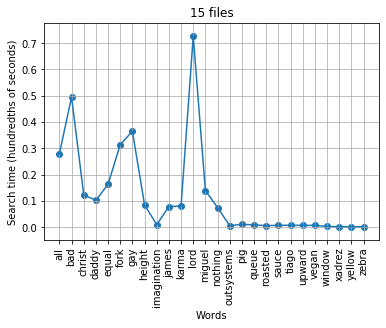

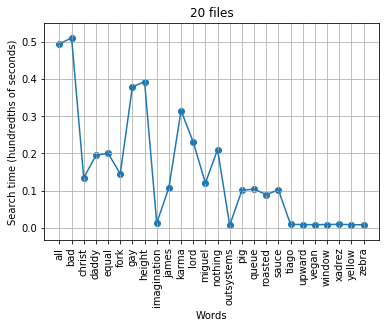

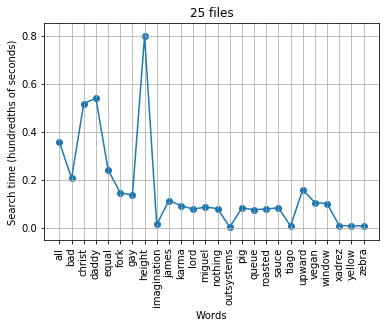

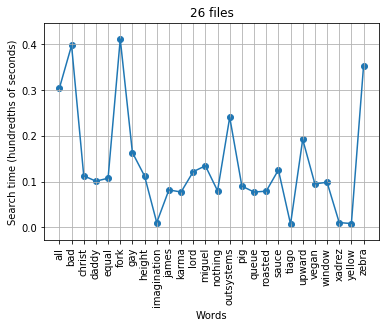

In [6]:
n_files = [5, 10, 15, 20, 25, 26]
n_keywords = [108853, 148317, 208205, 319209, 354364, 355750]
indexing_time = [10.735989800, 13.662305900, 19.434571300, 27.785123400, 32.663993800, 35.367244600]
search_words = ["all", "bad","christ","daddy","equal","fork","gay","height","imagination","james","karma","lord","miguel","nothing","outsystems","pig","queue","roasted","sauce","tiago","upward","vegan","window","xadrez","yellow","zebra"]

times_5_files = [0.003568400, 0.006832400, 0.001597300, 0.001496800, 0.004023000, 0.000534500, 0.000374400, 0.000099000, 0.000088000, 0.000086100, 0.000614200, 0.000116700, 0.000092700, 0.000089700, 0.000291700, 0.000319200, 0.000107100, 0.000095800, 0.000095600, 0.000105900, 0.000112700, 0.000107800, 0.000103600, 0.000099600, 0.001578200, 0.000104500]
times_5_files = list(map(lambda x: x * 100, times_5_files))

times_10_files = [0.003165000, 0.004122900, 0.002434900, 0.001299600, 0.002316200, 0.003867100, 0.002204900, 0.001042900, 0.000139000, 0.006859400, 0.000120600, 0.004320900, 0.000130800, 0.000673900, 0.000094000, 0.001457200, 0.000082300, 0.000076300, 0.000075500, 0.000074900, 0.000076700, 0.000071800, 0.000070500, 0.000076000, 0.000075200, 0.000074100]
times_10_files = list(map(lambda x: x * 100, times_10_files))

times_15_files = [0.002803200, 0.004950800, 0.001234600, 0.001029100, 0.001641100, 0.003147200, 0.003651000, 0.000852900, 0.000104900, 0.000791800, 0.000811100, 0.007258300, 0.001401100, 0.000749900, 0.000065900, 0.000114100, 0.000097200, 0.000065900, 0.000078300, 0.000080100, 0.000077300, 0.000075800, 0.000034900, 0.000025900, 0.000022800, 0.000022500]
times_15_files = list(map(lambda x: x * 100, times_15_files))

times_20_files = [0.004947600, 0.005110200, 0.001347900, 0.001948800, 0.002006500, 0.001453500, 0.003794800, 0.003930800, 0.000127200, 0.001081900, 0.003154300, 0.002309300, 0.001203600, 0.002105300, 0.000068800, 0.001007100, 0.001042100, 0.000894800, 0.001021400, 0.000093400, 0.000088400, 0.000085400, 0.000089800, 0.000095000, 0.000084800, 0.000082700]
times_20_files = list(map(lambda x: x * 100, times_20_files))

times_25_files = [0.003566100, 0.002070600, 0.005180400, 0.005406800, 0.002422100, 0.001464000, 0.001372000, 0.007990600, 0.000145200, 0.001143100, 0.000929900, 0.000780200, 0.000875000, 0.000806700, 0.000036600, 0.000830300, 0.000764600, 0.000790200, 0.000839900, 0.000082200, 0.001595100, 0.001057900, 0.001018300, 0.000101300, 0.000090300, 0.000086300]
times_25_files = list(map(lambda x: x * 100, times_25_files))

times_26_files = [0.003046800, 0.003978200, 0.001130200, 0.001011700, 0.001077000, 0.004117600, 0.001638300, 0.001124100, 0.000107400, 0.000821300, 0.000775100, 0.001219600, 0.001348500, 0.000801100, 0.002408500, 0.000903600, 0.000774900, 0.000793600, 0.001257100, 0.000074000, 0.001924700, 0.000953100, 0.000987900, 0.000107900, 0.000085500, 0.003523100]
times_26_files = list(map(lambda x: x * 100, times_26_files))

# Number of files per indexing time
fig = plt.figure(1)
plt.title("Indexing time per keywords (Number of files / Number of keywords / Indexing time)")
plt.xlabel("Number of keywords")
plt.ylabel("Indexing time (s)")
plt.scatter(n_keywords, indexing_time)
for i in range(len(n_files)):
    plt.annotate("(" + str(n_files[i]) + " / " + str(n_keywords[i]) + " / " + str(indexing_time[i]) + ")", xy=(n_keywords[i], indexing_time[i]))
#fig.savefig('Plots/Searchable/Indexing_time_per_keywords.png', bbox_inches='tight', dpi=150)

# Words per search time for 5 files
plot_figure(2, "5 files", times_5_files, 'Plots/Searchable/Search_time_per_words_5.png')

# Words per search time for 10 files
plot_figure(3, "10 files", times_10_files, 'Plots/Searchable/Search_time_per_words_10.png')

# Words per search time for 15 files
plot_figure(4, "15 files", times_15_files, 'Plots/Searchable/Search_time_per_words_15.png')

# Words per search time for 20 files
plot_figure(5, "20 files", times_20_files, 'Plots/Searchable/Search_time_per_words_20.png')

# Words per search time for 25 files
plot_figure(6, "25 files", times_25_files, 'Plots/Searchable/Search_time_per_words_25.png')

# Words per search time for 26 files
plot_figure(7, "26 files", times_26_files, 'Plots/Searchable/Search_time_per_words_26.png')

plt.show()

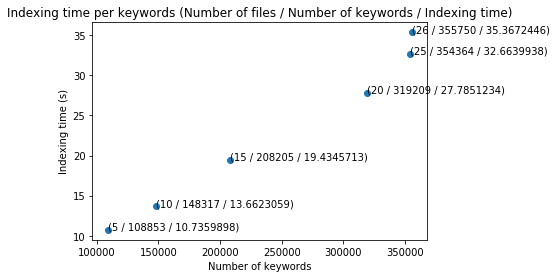

In [14]:
import plotly.express as px
fig = plt.figure(1)
plt.title("Indexing time per keywords (Number of files / Number of keywords / Indexing time)")
plt.xlabel("Number of keywords")
plt.ylabel("Indexing time (s)")
plt.scatter(n_keywords, indexing_time)
for i in range(len(n_files)):
    plt.annotate("(" + str(n_files[i]) + " / " + str(n_keywords[i]) + " / " + str(indexing_time[i]) + ")", xy=(n_keywords[i], indexing_time[i]))


In [22]:
import plotly.express as px

to_plot = pd.DataFrame(np.array([n_keywords,indexing_time,["5","10","15","20","25","26"]]).T,
            columns=["Number Unique Words","Indexing Time (s)","Number Files"])
fig = px.scatter(to_plot, y="Indexing Time (s)", 
                 x="Number Unique Words", color="Number Files",
                 
                color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [32]:
fig = px.scatter(to_plot, y="Indexing Time (s)", 
                 x="Number Unique Words", color="Number Files",
                 
                color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [9]:
f = open("resultados_noite.txt", "r")
#print(f.readlines())
lines = f.readlines()
time_variance = []
time_normalize = []
for i,line in enumerate(lines):
    if "VARIANCE" in line:
        print(lines[i+2].split()[-2])
        time_variance.append(float(lines[i+2].split()[-2]))

0.4599
2.4494
4.43
6.4204
8.3993
10.3891
12.368
14.3875
16.485
18.4957
20.513
22.5356
24.5011
26.5003
28.5118
30.5316
32.6532
34.2262
36.399
38.3941
40.1818
42.5285
44.6288
46.5002
48.1402
50.1391
52.1874
54.6024
56.5348
58.6454
60.1836
62.2394
64.6403
66.6027
68.4129
70.6521
72.6287
74.6868
76.7528
78.6645
80.4751
82.1061
84.0223
85.9788
88.4122
90.7294
92.0994
94.5137
96.4109
98.6263
100.6324
102.5311
104.7256
106.4499
108.4297
110.744
112.6965
114.7589
116.766
117.928
119.623
122.3911
124.1088
126.693
128.7259
130.4302
131.8046
133.6578
135.9152
138.5024
139.7894
142.3231
144.7724
145.6155
147.9318
150.7598
151.8314
154.8059
156.7685
158.7078
159.3944
161.7366
164.6127
166.6949
168.9082
169.7311
171.5699
173.5425
176.203
185.9146
179.7359
182.8268
183.7206
186.868
188.5807
190.067
192.0286
194.5773
195.4971
198.8313
200.3552
201.5264
203.6313
206.7228
208.8251
210.7312
212.1359
214.2456
216.5962
218.6748
220.3929
235.7563
224.1404
226.8005
227.3122
230.6894
233.0001
235.0209
236.186

In [10]:
time_variance

[0.4599,
 2.4494,
 4.43,
 6.4204,
 8.3993,
 10.3891,
 12.368,
 14.3875,
 16.485,
 18.4957,
 20.513,
 22.5356,
 24.5011,
 26.5003,
 28.5118,
 30.5316,
 32.6532,
 34.2262,
 36.399,
 38.3941,
 40.1818,
 42.5285,
 44.6288,
 46.5002,
 48.1402,
 50.1391,
 52.1874,
 54.6024,
 56.5348,
 58.6454,
 60.1836,
 62.2394,
 64.6403,
 66.6027,
 68.4129,
 70.6521,
 72.6287,
 74.6868,
 76.7528,
 78.6645,
 80.4751,
 82.1061,
 84.0223,
 85.9788,
 88.4122,
 90.7294,
 92.0994,
 94.5137,
 96.4109,
 98.6263,
 100.6324,
 102.5311,
 104.7256,
 106.4499,
 108.4297,
 110.744,
 112.6965,
 114.7589,
 116.766,
 117.928,
 119.623,
 122.3911,
 124.1088,
 126.693,
 128.7259,
 130.4302,
 131.8046,
 133.6578,
 135.9152,
 138.5024,
 139.7894,
 142.3231,
 144.7724,
 145.6155,
 147.9318,
 150.7598,
 151.8314,
 154.8059,
 156.7685,
 158.7078,
 159.3944,
 161.7366,
 164.6127,
 166.6949,
 168.9082,
 169.7311,
 171.5699,
 173.5425,
 176.203,
 185.9146,
 179.7359,
 182.8268,
 183.7206,
 186.868,
 188.5807,
 190.067,
 192.0286,
 1

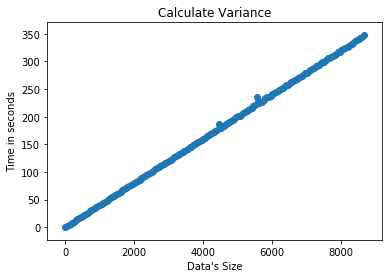

In [17]:
y = time_variance
x = [10+50*i for i in range(len(time_variance))]
plt.plot(x,y)
plt.scatter(x,y)
plt.title("Calculate Variance")
plt.xlabel("Data's Size")
plt.ylabel("Time in seconds")
plt.show()

In [21]:
x = [10+50*i for i in range(400)]
x

[10,
 60,
 110,
 160,
 210,
 260,
 310,
 360,
 410,
 460,
 510,
 560,
 610,
 660,
 710,
 760,
 810,
 860,
 910,
 960,
 1010,
 1060,
 1110,
 1160,
 1210,
 1260,
 1310,
 1360,
 1410,
 1460,
 1510,
 1560,
 1610,
 1660,
 1710,
 1760,
 1810,
 1860,
 1910,
 1960,
 2010,
 2060,
 2110,
 2160,
 2210,
 2260,
 2310,
 2360,
 2410,
 2460,
 2510,
 2560,
 2610,
 2660,
 2710,
 2760,
 2810,
 2860,
 2910,
 2960,
 3010,
 3060,
 3110,
 3160,
 3210,
 3260,
 3310,
 3360,
 3410,
 3460,
 3510,
 3560,
 3610,
 3660,
 3710,
 3760,
 3810,
 3860,
 3910,
 3960,
 4010,
 4060,
 4110,
 4160,
 4210,
 4260,
 4310,
 4360,
 4410,
 4460,
 4510,
 4560,
 4610,
 4660,
 4710,
 4760,
 4810,
 4860,
 4910,
 4960,
 5010,
 5060,
 5110,
 5160,
 5210,
 5260,
 5310,
 5360,
 5410,
 5460,
 5510,
 5560,
 5610,
 5660,
 5710,
 5760,
 5810,
 5860,
 5910,
 5960,
 6010,
 6060,
 6110,
 6160,
 6210,
 6260,
 6310,
 6360,
 6410,
 6460,
 6510,
 6560,
 6610,
 6660,
 6710,
 6760,
 6810,
 6860,
 6910,
 6960,
 7010,
 7060,
 7110,
 7160,
 7210,
 7260,
